# Regression and Prediction

## Contents of this Chapter:

### Main Sub-titles

1. 단순 선형 회귀
2. 다중 선형 회귀
3. 회귀를 이용한 예측
4. 회귀에서의 요인변수(범주형 변수)
5. 회귀방정식(모델) 해석하기
6. 가정들을 검증하기: 회귀 진단
7. 다항 회귀와 스플라인 회귀: 비선형 회귀 다루기

### 들어가면서

통계학에서 일반적인 목표 중에 하나가 바로**예측**임


In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 단순 선형 회귀
* 단순 선형 회귀는 한 변수와 또 다른 변수의 크기 사이의 어떤 관계를 모델링한다. 1장에서 다룬 상관관계 역시 그 방법 중 하나이다.  

* 상관관계는 두 변수 사이의 관련 강도를 측정이라면, 회귀는 관계 자체를 정량화 하는 것이다.

* 기본적인 선형 회귀의 수식은 다음과 같다: $ Y_i = \beta_0 + \beta_1 X_i $

    -  $ \beta_0 $ 는 절편
    -  $ \beta_1 $ 는 기울기
    -  $ Y_i $ 는 응답변수 또는 종속변수 (머신러닝에서는 목표)
    -  $ X_i $ 는 예측변수 또는 독립변수 (머신러닝에서는 피처)    

In [4]:
lung_data = pd.read_csv('../data/LungDisease.csv')

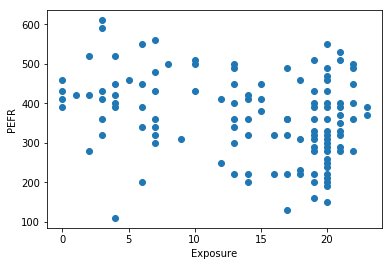

In [5]:
plt.scatter(lung_data['Exposure'],lung_data['PEFR'])
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.show()

* 위 그림에서 단순 선형 회귀의 목적은 Exposure(면진에 대한 노출)로 응답변수 PEFR(폐활량)을 예측하기 위한 최선의 직선을 찾는 것이다.
  
  PEFR = $ b_0 + b_1노출 $

In [6]:
# initializing the input variables

X = np.array(lung_data['Exposure']).reshape(-1,1)
y = np.array(lung_data['PEFR']).reshape(-1,1)

# initiating the object for Linear Regression
lin_reg = LinearRegression()

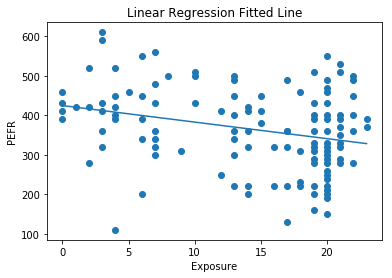

-----------------------------------------------------

The main variables in the linear regression are:

The Coefficient(b1) : [[-4.18457649]]
The Intercept(b0) : [424.58280657]


In [8]:
lin_reg.fit(X,y)
predictions = lin_reg.predict( X )

plt.scatter(lung_data['Exposure'], lung_data['PEFR'] )
plt.plot(X,predictions)
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.title('Linear Regression Fitted Line')
plt.show()

print('-----------------------------------------------------\n')

print('The main variables in the linear regression are:\n')
print('The Coefficient(b1) :',lin_reg.coef_)
print('The Intercept(b0) :',lin_reg.intercept_)

In [9]:
# The error of the model will be:
# the idea is to reduce this error:

res_error = predictions

### 어떻게 $ b_0 $와 $ b_1 $을 찾을 수 있을까?

$ b_0 $와 $ b_1 $를 찾기 위한 방법은 최소제곱회귀 또는 보통최소제곱(Ordinary Least Squares, OLS)이다. 

$ \hat b_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2} $ 

$ \hat b_0 = \bar{Y} – \hat b_1 \bar{X} $

- $ \bar{X} $는 예측변수(피처)
- $ \bar{Y} $는 응답변수(결과값)


## 2. 다중 선형 회귀

* 예측변수가 여러 개인 경우, 단순 선형 회귀로는 예측이 가능하지 않다.  회귀 방정식은 아래와 같이 여러 개의 예측변수를 포함하도록 해야한다. 

  $ Y = b_0 + b_1X_1 + b_2X_2 + ... + b_pX_p + e $
  
* 이 회귀 모델은 직선은 아니겠지만, 각 예측변수와 계수간의 관계를 여전히 선형 모형이 된다.

### 킹카운티 주택 정보 예제

* 주어진 변수로부터 판매 금액을 예측하는 것이 목표이다.


In [10]:
house_data = pd.read_csv('../data/house_sales.csv',sep='\t')

In [12]:
# Simple Linear Regression
X = np.array(house_data['SqFtLot']).reshape(-1,1)
y = np.array(house_data['AdjSalePrice']).reshape(-1,1)

lin_reg.fit(X,y)

predictions_simple_linear_regression = lin_reg.predict(X)

print('Error of Simple Linear Regression Model is :',mean_squared_error(predictions_simple_linear_regression,y)**(0.5))

Error of Simple Linear Regression Model is : 381769.33881840616


In [59]:
# Multiple Linear Regression
features = ['SqFtLot','SqFtTotLiving','Bathrooms','Bedrooms','BldgGrade']
X = np.array(house_data[features])
y = np.array(house_data['AdjSalePrice']).reshape(-1,1)

lin_reg.fit(X,y)

predictions_simple_linear_regression = lin_reg.predict(X)

print('Error of Simple Linear Regression Model is :',mean_squared_error(predictions_simple_linear_regression,y)**(0.5))

Error of Simple Linear Regression Model is : 261209.6915601493


In [60]:
features.append('AdjSalePrice')
house_data[features].head(5)

,SqFtLot,SqFtTotLiving,Bathrooms,Bedrooms,BldgGrade,AdjSalePrice
1,9373,2400,3.00,6,7,300805.0
2,20156,3764,3.75,4,10,1076162.0
3,26036,2060,1.75,4,8,761805.0
4,8618,3200,3.75,5,7,442065.0
5,8620,1720,1.75,4,7,297065.0


In [49]:
# Printing coefficients of the Multiple Linear Regression
print('Intercept : %f'%lin_reg.intercept_) 
for idx in range(0, len(features)):
    print(features[idx] + ' : %e'%lin_reg.coef_[0][idx])

Intercept : -521924.722038
SqFtLot : -6.050601e-02
SqFtTotLiving : 2.288321e+02
Bathrooms : -1.943810e+04
Bedrooms : -4.778115e+04
BldgGrade : 1.061172e+05


#### 모델에 대한 Coefficient 읽기
* SqFtTotLiving: 의 경우 1제곱피트르 증가되면, 예상가격은 229달러 증가할 것이다.